# Train And Test - CIRFAR-10 Image Classification AMD 9950X

- Imports
  - standard libs
  - 3rd party libs
  - alpabetical or logical grouping
- Set random seed
- Config and Hyperparams
- Dataset and Dataloader
- Model definition/class
- Helper functions (training, eval, visualization)
- Then main code
- Extras
  - We will need torchvision and use torchvision.datasets to load CIRFAR-10
  - CIFAR-10 is a 10 class image dataset, pretty small in size and good for lab/
  testing/learning
    - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

- 9950X 105w eco mode CO -30 all core
  - 200.25 seconds

2025-03-10 18:57:20,871 - root - INFO - Seed set to: 905436771
2025-03-10 18:57:20,873 - root - INFO - Using CPU only
  4%|▍         | 1/25 [00:06<02:41,  6.72s/it]

Epoch [1/25], Loss: 1.2759
Elapsed time: 6.72 seconds


  8%|▊         | 2/25 [00:13<02:32,  6.63s/it]

Epoch [2/25], Loss: 0.9117
Elapsed time: 13.29 seconds


 12%|█▏        | 3/25 [00:20<02:28,  6.77s/it]

Epoch [3/25], Loss: 0.7624
Elapsed time: 20.22 seconds


 16%|█▌        | 4/25 [00:28<02:32,  7.25s/it]

Epoch [4/25], Loss: 0.6456
Elapsed time: 28.20 seconds


 20%|██        | 5/25 [00:36<02:32,  7.62s/it]

Epoch [5/25], Loss: 0.5460
Elapsed time: 36.49 seconds


 24%|██▍       | 6/25 [00:44<02:28,  7.81s/it]

Epoch [6/25], Loss: 0.4568
Elapsed time: 44.65 seconds


 28%|██▊       | 7/25 [00:52<02:22,  7.92s/it]

Epoch [7/25], Loss: 0.3751
Elapsed time: 52.80 seconds


 32%|███▏      | 8/25 [01:00<02:15,  7.99s/it]

Epoch [8/25], Loss: 0.3108
Elapsed time: 60.94 seconds


 36%|███▌      | 9/25 [01:09<02:08,  8.01s/it]

Epoch [9/25], Loss: 0.2482
Elapsed time: 69.01 seconds


 40%|████      | 10/25 [01:17<02:01,  8.08s/it]

Epoch [10/25], Loss: 0.2015
Elapsed time: 77.23 seconds


 44%|████▍     | 11/25 [01:25<01:53,  8.10s/it]

Epoch [11/25], Loss: 0.1622
Elapsed time: 85.37 seconds


 48%|████▊     | 12/25 [01:33<01:45,  8.13s/it]

Epoch [12/25], Loss: 0.1394
Elapsed time: 93.57 seconds


 52%|█████▏    | 13/25 [01:41<01:38,  8.21s/it]

Epoch [13/25], Loss: 0.1208
Elapsed time: 101.98 seconds


 56%|█████▌    | 14/25 [01:50<01:30,  8.24s/it]

Epoch [14/25], Loss: 0.0977
Elapsed time: 110.30 seconds


 60%|██████    | 15/25 [01:58<01:22,  8.23s/it]

Epoch [15/25], Loss: 0.0960
Elapsed time: 118.48 seconds


 64%|██████▍   | 16/25 [02:06<01:13,  8.21s/it]

Epoch [16/25], Loss: 0.0860
Elapsed time: 126.66 seconds


 68%|██████▊   | 17/25 [02:14<01:05,  8.17s/it]

Epoch [17/25], Loss: 0.0825
Elapsed time: 134.74 seconds


 72%|███████▏  | 18/25 [02:22<00:57,  8.16s/it]

Epoch [18/25], Loss: 0.0798
Elapsed time: 142.88 seconds


 76%|███████▌  | 19/25 [02:30<00:48,  8.14s/it]

Epoch [19/25], Loss: 0.0691
Elapsed time: 150.97 seconds


 80%|████████  | 20/25 [02:39<00:40,  8.18s/it]

Epoch [20/25], Loss: 0.0743
Elapsed time: 159.23 seconds


 84%|████████▍ | 21/25 [02:47<00:32,  8.19s/it]

Epoch [21/25], Loss: 0.0702
Elapsed time: 167.44 seconds


 88%|████████▊ | 22/25 [02:55<00:24,  8.22s/it]

Epoch [22/25], Loss: 0.0679
Elapsed time: 175.75 seconds


 92%|█████████▏| 23/25 [03:03<00:16,  8.19s/it]

Epoch [23/25], Loss: 0.0647
Elapsed time: 183.87 seconds


 96%|█████████▌| 24/25 [03:12<00:08,  8.18s/it]

Epoch [24/25], Loss: 0.0628
Elapsed time: 192.03 seconds


100%|██████████| 25/25 [03:20<00:00,  8.01s/it]

Epoch [25/25], Loss: 0.0589
Elapsed time: 200.25 seconds


Accuracy on the test set: 69.81%


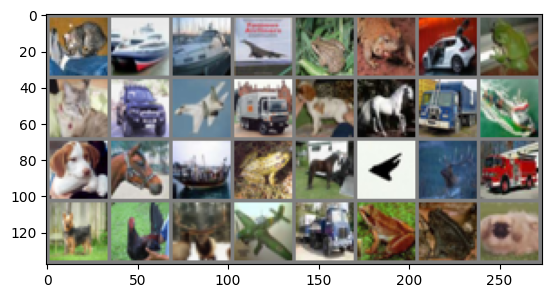

GroundTruth: cat ship ship airplane
Predicted: cat ship ship airplane
Model saved as cnn_cifar10.pth


In [5]:
import torch
import torch.nn as nn
from torch.amp import GradScaler, autocast
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import logging
import time
import tqdm

hp = {
    "batch_size": 32,
    "epochs": 25,
    "random_seed": 42,
    "randomize_seed": True,
    "cpu_only": True,
    "device": "cpu",
}

# Logging configuration
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# Randomize seed if set to True
if hp['randomize_seed']:
    hp['random_seed'] = random.randint(0, 1000000000)
logging.info(f"Seed set to: {hp['random_seed']}")  

# Simple CNN Class
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device configuration
def get_device():
    """
    This will check for an Intel XPU device and return it if available, otherwise it will return cpu.

    Returns the torch device to use.
    """
    if hp['cpu_only'] == False:
        #device = "xpu" if torch.xpu.is_available() else "cpu"
        if torch.xpu.is_available():
            device = "xpu"
        elif torch.cuda.is_available():
            device = "cuda"
        else:
            device = "cpu"

        logging.info(f"Using device: {device}")
        return device
    else:
        logging.info("Using CPU only")
        return "cpu"

def train_model(epochs, model, train_loader, device, optimizer, criterion, scaler=None):

    # Start timer
    start_time = time.time()

    # 5. Training the Model
    for epoch in tqdm.tqdm(range(epochs)):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            if device != "cpu":
                with torch.amp.autocast(device):
                    # Forward pass
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()
            else:
                with torch.amp.autocast(device):
                    # Forward pass
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    # Backward pass and optimization
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{hp["epochs"]}], Loss: {running_loss/len(train_loader):.4f}')

        # End timer
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Elapsed time: {elapsed_time:.2f} seconds")

# 7. Visualizing Some Predictions
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Main function
def main():

    # 1 Set the device
    hp["device"] = get_device()

    # 2 Dataset, Dataloader, Transform
    # The transform using (0.5, 0.5, 0.5) is used to normalize the image data
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # Download and load the training data
    train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                           download=True, transform=transform)
    # Download and load the test data
    test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
    # Create the dataloader for training and testing data
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                              batch_size=hp['batch_size'], shuffle=True)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                             batch_size=hp['batch_size'], shuffle=False)
    # 3 SimpleCNN Class
    model_0 = SimpleCNN().to(hp["device"])
    
    # 4 Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_0.parameters(), lr=0.001)

    if hp['cpu_only'] == False:
        scaler = torch.amp.GradScaler(hp["device"])
        train_model(hp["epochs"], model_0, train_loader, hp["device"], optimizer, criterion, scaler=scaler)
    else:
        scaler = torch.amp.GradScaler(hp["device"])
        train_model(hp["epochs"], model_0, train_loader, hp["device"], optimizer, criterion, scaler=scaler)

    # 6. Evaluating the Model
    model_0.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(hp["device"]), labels.to(hp["device"])
            outputs = model_0(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy on the test set: {100 * correct / total:.2f}%')

    # Get random test images and predictions
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images.to(hp["device"]), labels.to(hp["device"])

    # Display images
    imshow(torchvision.utils.make_grid(images.cpu()))
    print('GroundTruth:', ' '.join(f'{train_dataset.classes[labels[j]]}' for j in range(4)))

    # Predict and display results
    outputs = model_0(images)
    _, predicted = torch.max(outputs, 1)
    print('Predicted:', ' '.join(f'{train_dataset.classes[predicted[j]]}' for j in range(4)))

    # 8. Saving the Model
    torch.save(model_0.state_dict(), 'cnn_cifar10.pth')
    print("Model saved as cnn_cifar10.pth")

# Run the main function
if __name__ == '__main__':
    main()
